In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from analysis import Subject, io, logger
from analysis.consts import TIME_WINDOW, TRIAL_DURATION

logger.setLevel("INFO")

In [6]:
from analysis.postprocess import calc_mean_nb_of_fixes_for_time_window_all_trial


def calc_nb_fixes(roots: list[Path]) -> pd.DataFrame:
    indecies: list[str] = []
    data = []
    for root in roots:
        subj = Subject(root)
        indecies.append(subj.name)
        mean_nb_of_fixes = calc_mean_nb_of_fixes_for_time_window_all_trial(subj)
        data.append(mean_nb_of_fixes)

    df = pd.DataFrame(data, index=indecies)
    df.columns = [
        f"{i}[s]-{i+TIME_WINDOW}[s]" for i in range(0, TRIAL_DURATION, TIME_WINDOW)
    ]
    return df


timer_subj_roots, control_subj_roots = io.load_path(Path("results/subjects"))
timer_df = calc_nb_fixes(timer_subj_roots)
control_df = calc_nb_fixes(control_subj_roots)


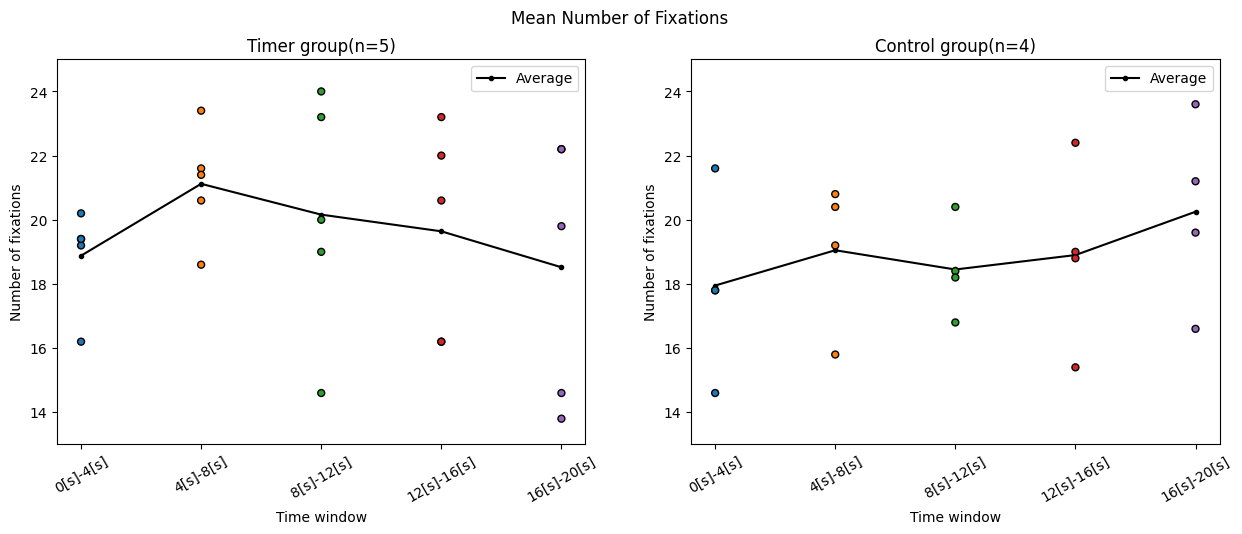

In [10]:
def plot(df, ax):
    # sns.boxplot(
    #     df,
    #     # fill=False,
    #     ax=ax,
    # )
    sns.stripplot(
        df,
        size=5,
        edgecolor="black",
        linewidth=1,
        alpha=1,
        ax=ax,
        # label="Individual data",
        jitter=False,
    )
    ax.plot(df.mean(), color="black", marker=".", label="Average")
    ax.legend()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Mean Number of Fixations")

plot(timer_df, axes[0])
n = len(timer_df)
axes[0].set_title(f"Timer group({n=})")

plot(control_df, axes[1])
n = len(control_df)
axes[1].set_title(f"Control group({n=})")

for ax in axes:
    ax.set_xlabel("Time window")
    ax.set_ylabel("Number of fixations")
    ax.set_ylim(13, 25)
    ax.tick_params(axis="x", labelrotation=30)

plt.show()